# Model Evaluation

### Third party modules

In [1]:
# Built in
import calendar
import sys
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import STL


### First party modules

In [ ]:
# Get the project root
ROOT_DIR = Path.cwd().parent

# Add root path as path project for modules imports
sys.path.append(str(ROOT_DIR))  

from src.visualization import plot_enhanced_stl_decomposition

## Data

In [3]:
# replace for "../data/raw/daily_energy_production.csv" for a classic path
data_path = ROOT_DIR / "data" / "raw" / "daily_energy_production.csv"
df = pd.read_csv(data_path) 

df["Date"] = pd.to_datetime(df["Date"])
df_indexed = df.set_index("Date")

In [17]:
target_column = "Solar"

In [18]:
stl = STL(
    df_indexed[target_column],
    period=12,  # Set known seasonality period
    # seasonal=13,  # Controls smoothness of seasonal component
    trend=None,  # Controls smoothness of trend component
    low_pass=None,  # Controls smoothness of low-pass filter
    seasonal_deg=1,  # Degree for seasonal LOESS
    trend_deg=1,  # Degree for trend LOESS
    low_pass_deg=1,  # Degree for low-pass LOESS
)

In [19]:
result = stl.fit()

(<Figure size 1400x1200 with 5 Axes>,
 array([<Axes: ylabel='Original'>, <Axes: ylabel='Trend'>,
        <Axes: ylabel='Seasonal'>, <Axes: ylabel='Residual'>,
        <Axes: ylabel='Deseasonalized'>], dtype=object))

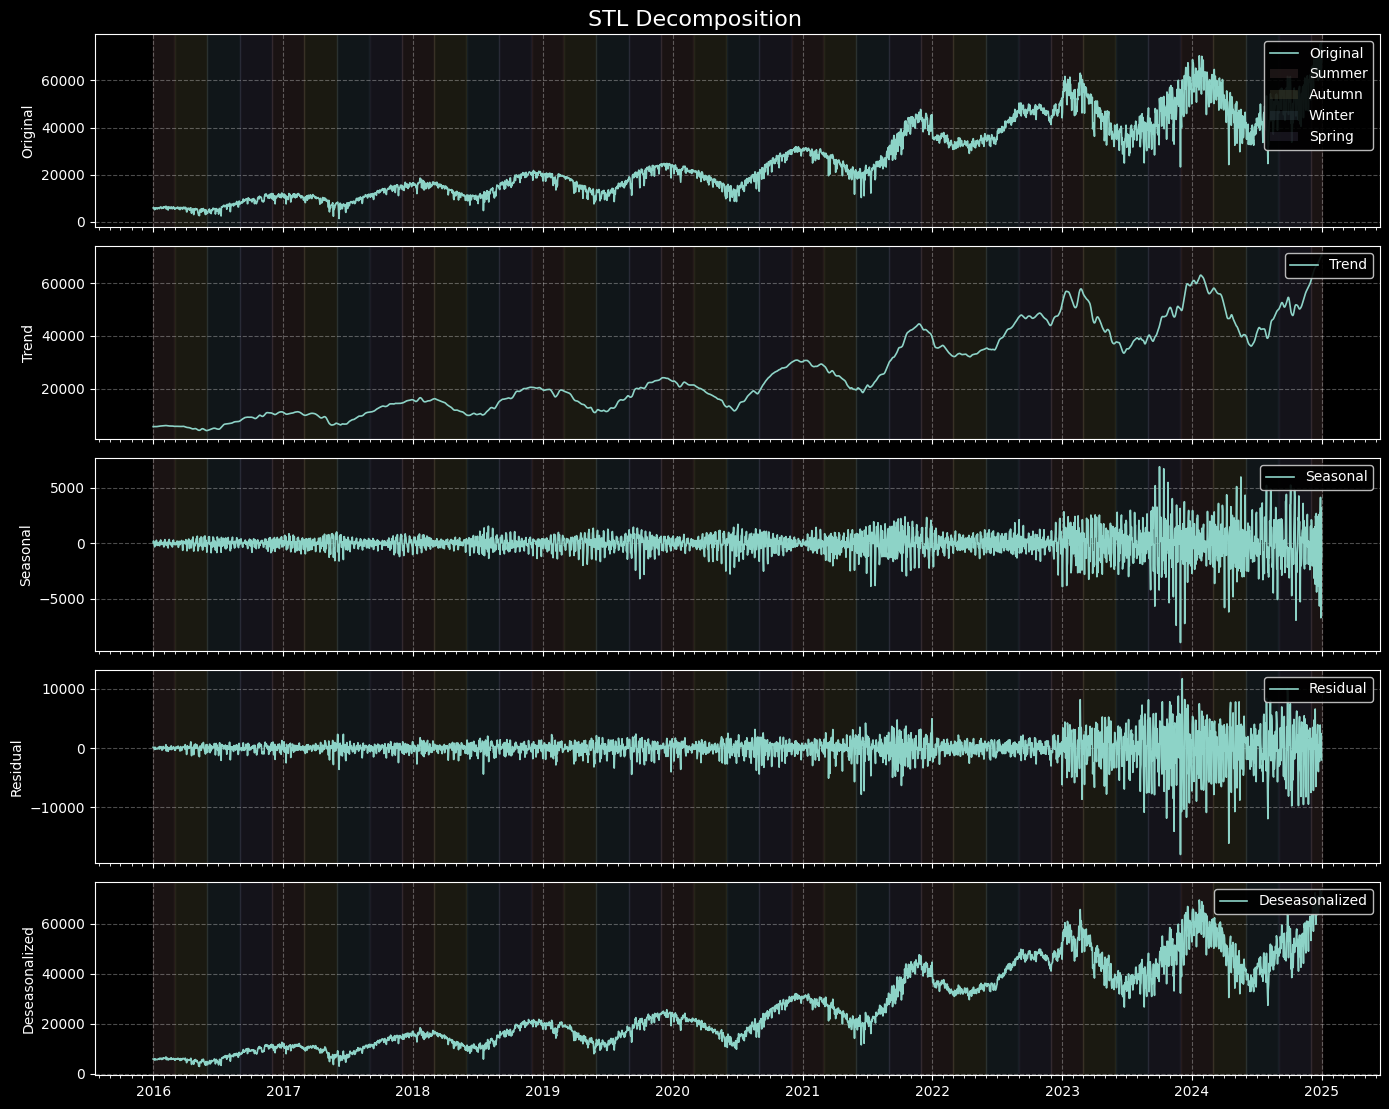

In [20]:
plot_enhanced_stl_decomposition(df=df_indexed, target_column=target_column, result=result)